# Random Forest Classifier - Census Data

In [1]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

df_census = pd.read_csv('../input/logreg-xgbclf-census/census_data_cleaned.csv')

df_census.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
X_census = df_census.iloc[:,:-1]
y_census = df_census.iloc[:,-1]

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rand_clf = RandomForestClassifier(n_estimators=10, n_jobs=-1,random_state=2)

scores = cross_val_score(rand_clf, X_census,y_census, cv=5)


In [4]:
print('Accuracy Score: ', np.round(scores,3))
print('Accuracy mean: %0.3f' % (scores.mean()))

Accuracy Score:  [0.851 0.844 0.851 0.852 0.851]
Accuracy mean: 0.850


# oob_score

In [5]:
rand_clf = RandomForestClassifier(n_estimators=10, oob_score=True, n_jobs=-1, random_state=2)

rand_clf.fit(X_census, y_census)

rand_clf.oob_score_

0.8343109855348423

# n_estimators

In [6]:
rand_clf = RandomForestClassifier(oob_score=True, n_estimators=50, random_state=2, n_jobs=-1)
rand_clf.fit(X_census,y_census)
rand_clf.oob_score_

0.8518780135745216

In [7]:
rand_clf = RandomForestClassifier(oob_score=True, n_estimators=100, random_state=2, n_jobs=-1)
rand_clf.fit(X_census,y_census)
rand_clf.oob_score_

0.8551334418476091

# warm start

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [9]:
oob_scores = []

rand_clf = RandomForestClassifier(oob_score=True, n_estimators=50, warm_start=True, random_state=2, n_jobs=-1)
rand_clf.fit(X_census, y_census)
oob_scores.append(rand_clf.oob_score_)

In [10]:
est = 50
estimators = [est]

In [11]:
for i in range(9):
    est += 50
    estimators.append(est)
    rand_clf.set_params(n_estimators = est)
    rand_clf.fit(X_census, y_census)
    oob_scores.append(rand_clf.oob_score_)
    

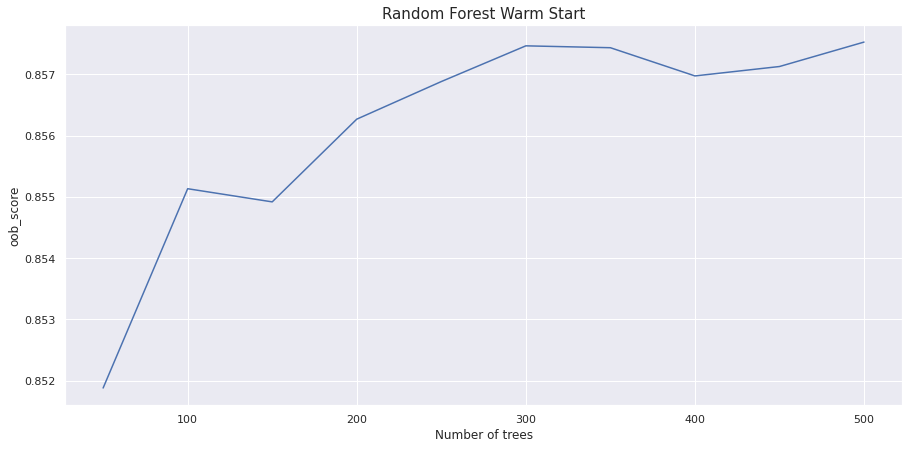

In [12]:
plt.figure(figsize=(15,7))
plt.plot(estimators, oob_scores)
plt.xlabel('Number of trees')
plt.ylabel('oob_score')
plt.title('Random Forest Warm Start', fontsize=15)
plt.savefig('Random_Forest_Warm_Start', dpi=325)
plt.show()

As you can see, the number of trees tends to peak at around 300. It's more costly and time-consuming to use more trees than 300, and the
gains are minimal at best.

# Random Forest Regressor - Bikes Rental

In [13]:
df_bikes = pd.read_csv('../input/data-wrangling-bike-rentals/bike_rentals_cleaned.csv')

df_bikes.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1.0,0.0,1,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1.0,0.0,1,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1.0,0.0,1,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1.0,0.0,1,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1.0,0.0,1,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,1600


In [14]:
X_bikes = df_bikes.iloc[:,:-1]
y_bikes = df_bikes.iloc[:,-1]

In [15]:
from sklearn.ensemble import RandomForestRegressor

rand_reg = RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=2)

scores = cross_val_score(rand_reg, X_bikes, y_bikes, scoring='neg_mean_squared_error', cv=10)

rmse = np.sqrt(-scores)

In [16]:
print('RMSE Score:',np.round(rmse,3))
print('RMSE Mean: %0.3f' % rmse.mean())

RMSE Score: [ 801.486  579.987  551.347  846.698  895.05  1097.522  893.738  809.284
  833.488 2145.046]
RMSE Mean: 945.365


# Tuning Random Forest

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_bikes, y_bikes, random_state=2)

In [18]:
reg_oob_scores = []
rand_reg = RandomForestRegressor(oob_score=True, n_estimators=50, warm_start=True, random_state=2, n_jobs=-1)
rand_reg.fit(X_bikes,y_bikes)
reg_oob_scores.append(rand_reg.oob_score_)

est=50
reg_estimators = [est]

for i in range(9):
    est +=50
    reg_estimators.append(est)
    rand_reg.set_params(n_estimators=est)
    rand_reg.fit(X_bikes, y_bikes)
    reg_oob_scores.append(rand_reg.oob_score_)

In [19]:
print(reg_estimators,reg_oob_scores)

[50, 100, 150, 200, 250, 300, 350, 400, 450, 500] [0.8829862854892176, 0.8832283295279391, 0.8833712967399434, 0.8838046561167241, 0.8841746949084028, 0.8843749993786649, 0.8855335998631343, 0.8857983620217611, 0.8856536763010132, 0.8856434522639294]


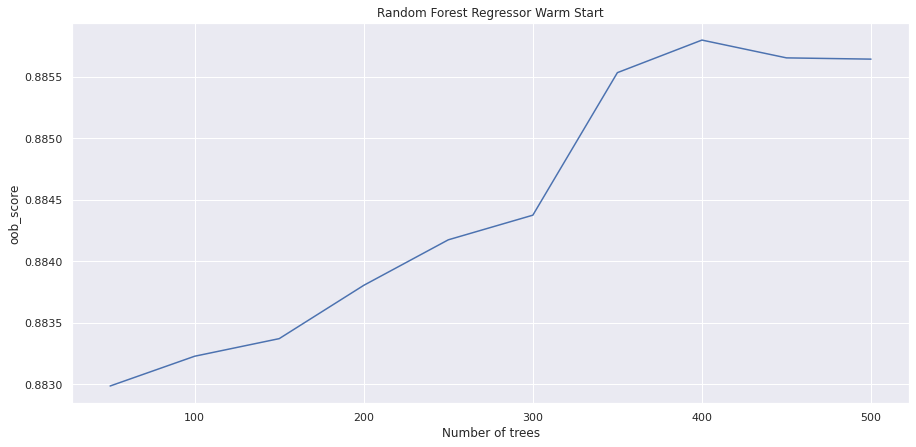

In [20]:
plt.figure(figsize=(15,7))
plt.plot(reg_estimators, reg_oob_scores)
plt.xlabel('Number of trees')
plt.ylabel('oob_score')
plt.title('Random Forest Regressor Warm Start')
plt.savefig('Random_Forest_Regressor_Warm_Start', dpi=325)
plt.show()

The random forest provides the best score with 50 estimators. After 100 estimators, the error gradually
starts to go up

In [25]:
from sklearn.model_selection import cross_val_score

rand_reg = RandomForestRegressor(n_estimators=50, warm_start=True, random_state=2, n_jobs=-1)
scores = cross_val_score(rand_reg, X_bikes, y_bikes, scoring='neg_mean_squared_error', cv=10)
rmse = np.sqrt(-scores)
print('RMSE scores:', np.round(rmse,3))
print('RMSE Mean: %0.3f' % rmse.mean())


RMSE scores: [ 836.482  541.898  533.086  812.782  894.877  881.117  794.103  828.968
  772.517 2128.148]
RMSE Mean: 902.398


This score is better than earlier. the error in the last fold is much higher according to the last entry in the RMSE
array. This could be due to errors within the data or outliers.

# Fine Tuning Hyperparameters

In [33]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

def randomized_search_reg(params, reg = RandomForestRegressor(random_state=2, n_jobs=-1), runs=16):
    rand_reg = RandomizedSearchCV(reg, params, n_iter=runs, scoring='neg_mean_squared_error',cv=10, n_jobs=-1, random_state=2)
    rand_reg.fit(X_train,y_train)
    best_model = rand_reg.best_estimator_
    best_params = rand_reg.best_params_
    print('Best Params:',best_params)
    best_score = np.sqrt(-rand_reg.best_score_)
    print('Training score: {:.3f}'.format(best_score))
    y_preds = best_model.predict(X_test)
    
    rmse_test = mean_squared_error(y_preds, y_test)**0.5
    print('RMSE:{:.3f}'.format(rmse_test))
    


In [34]:
randomized_search_reg(params={'min_weight_fraction_leaf':[0.0,0.0025,0.005,0.0075,0.01,0.05],
                             'min_samples_split':[2, 0.01, 0.02, 0.03, 0.04, 0.06, 0.08,0.1],
                              'min_samples_leaf':[1,2,4,6,8,10,20,30],
                              'min_impurity_decrease':[0.0, 0.01, 0.05,0.10, 0.15, 0.2],
                              'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
                              'max_features':['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
                              'max_depth':[None,2,4,6,8,10,20]})

Best Params: {'min_weight_fraction_leaf': 0.0, 'min_samples_split': 0.03, 'min_samples_leaf': 6, 'min_impurity_decrease': 0.05, 'max_leaf_nodes': 25, 'max_features': 0.7, 'max_depth': None}
Training score: 759.076
RMSE:701.802


In [35]:
randomized_search_reg(params={'min_samples_leaf':[1,2,4,6,8,10,20,30],
                              'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
                              'max_features':['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
                              'max_depth':[None,2,4,6,8,10,20]})

Best Params: {'min_samples_leaf': 1, 'min_impurity_decrease': 0.1, 'max_features': 0.6, 'max_depth': 10}
Training score: 679.052
RMSE:626.541


In [36]:
randomized_search_reg(params={'min_samples_leaf':[1,2,4,6,8,10,20,30],
                              'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
                              'max_features':['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
                              'max_depth':[None,4,6,8,10,12,15,20]},runs=20)

Best Params: {'min_samples_leaf': 1, 'min_impurity_decrease': 0.1, 'max_features': 0.6, 'max_depth': 12}
Training score: 675.128
RMSE:619.014


In [37]:
randomized_search_reg(params={'min_samples_leaf':[1,2,3,4,5,6],
                              'min_impurity_decrease':[0.0, 0.01, 0.05, 0.08, 0.10, 0.12, 0.15],
                              'max_features':['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
                              'max_depth':[None,8,10,12,14,16,18,20]})

Best Params: {'min_samples_leaf': 1, 'min_impurity_decrease': 0.05, 'max_features': 0.7, 'max_depth': 18}
Training score: 679.595
RMSE:630.954


The test score has gone back up. Increasing n_estimators at this point could be a good idea. The more trees in the forest, the more
potential there may be to realize small gains.

In [38]:
randomized_search_reg(params={'min_samples_leaf':[1,2,4,6,8,10,20,30],
                              'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
                              'max_features':['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
                              'max_depth':[None,4,6,8,10,12,15,20],
                             'n_estimators':[100]},runs=20)

Best Params: {'n_estimators': 100, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.1, 'max_features': 0.6, 'max_depth': 12}
Training score: 675.128
RMSE:619.014


In [39]:
rand_reg = RandomForestRegressor(n_estimators=100, min_impurity_decrease=0.1, max_features=0.6, max_depth=12, warm_start=True, n_jobs=-1, random_state=2)

scores = cross_val_score(rand_reg, X_bikes, y_bikes, scoring='neg_mean_squared_error',cv=10)

rmse = np.sqrt(-scores)

print('RMSE:', np.round(rmse,3))

print('RMSE Mean: {:.3f}'.format(rmse.mean()))

RMSE: [ 818.354  514.173  547.392  814.059  769.54   730.025  831.376  794.634
  756.83  1595.237]
RMSE Mean: 817.162


In [40]:
from sklearn.utils import shuffle

df_shuffle_bikes = shuffle(df_bikes, random_state=2)

In [41]:
X_shuffle_bikes = df_shuffle_bikes.iloc[:,:-1]
y_shuffle_bikes = df_shuffle_bikes.iloc[:,-1]

In [42]:
rand_reg = RandomForestRegressor(n_estimators=100, min_impurity_decrease=0.1, max_features=0.6, max_depth=12, warm_start=True, n_jobs=-1, random_state=2)

scores = cross_val_score(rand_reg, X_shuffle_bikes, y_shuffle_bikes, scoring='neg_mean_squared_error',cv=10)

rmse = np.sqrt(-scores)

print('RMSE:', np.round(rmse,3))

print('RMSE Mean: {:.3f}'.format(rmse.mean()))

RMSE: [630.093 686.673 468.159 526.676 593.033 724.575 774.402 672.63  760.253
 616.797]
RMSE Mean: 645.329


In [ ]:
In the shuffled data, there is no issue with the last split, and the score is much higher, as expected.

In the shuffled data, there is no issue with the last split, and the score is much higher, as expected.